# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# added these dependencies
import json
import scipy.stats as st
from pprint import pprint
#this was already here
from scipy.stats import linregress


# Import API key after I placed the api keys file into the weather folder
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_weather = []

print ("Beginning Data Retrieval")
print("--------------------------")

rcd = 0
sets = 1
for city in cities:
    rcd += 1
  
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        sets += 1
        rcd = 0
    
    try:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(url).json()
        city_weather.append({
            'city':city,
            'lat': response['coord']['lat'],
            'lon': response['coord']['lon'],
            'temp': response['main']['temp_max'],
            'humidity': response['main']['humidity'],
            'wind': response['wind']['speed'],
            'cloud': response['clouds']['all'],
            'country': response['sys']['country'],
            'date': response['dt']
        })
    except:
        print('City not found. Skipping...')
        pass                        
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | valdivia
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | marawi
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | beringovskiy
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | olinda
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | zorgo
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | ha tinh
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | arraial do cabo
Processing

Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | havelock
Processing Record 42 of Set 4 | baker city
Processing Record 43 of Set 4 | namalenga
Processing Record 44 of Set 4 | huanren
Processing Record 45 of Set 4 | hargeysa
Processing Record 46 of Set 4 | godfrey
Processing Record 47 of Set 4 | flinders
Processing Record 48 of Set 4 | discovery bay
Processing Record 49 of Set 4 | buraydah
Processing Record 50 of Set 4 | the valley
Processing Record 1 of Set 5 | tamale
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | porbandar
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | atar
Processing Record 7 of Set 5 | maryborough
Processing Record 8 of Set 5 | cabugao
Processing Record 9 of Set 5 | oskarshamn
Processing Record 10 of Set 5 | isangel
Processing Record 11 of Set 5 | teruel
Processing Record 12 o

Processing Record 28 of Set 8 | langxiang
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | somerset
Processing Record 32 of Set 8 | port hardy
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | cholet
Processing Record 36 of Set 8 | melo
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | warqla
City not found. Skipping...
Processing Record 41 of Set 8 | sao filipe
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | nanzhang
Processing Record 44 of Set 8 | sobolevo
Processing Record 45 of Set 8 | mandalgovi
Processing Record 46 of Set 8 | jefferson city
Processing Record 47 of Set 8 | gamba
Processing Record 48 of Set 8 | awbari
Processing Record 49 of Set 8 | rolim de moura
City not found. Skipp

Processing Record 13 of Set 12 | dingle
Processing Record 14 of Set 12 | kontagora
Processing Record 15 of Set 12 | vigrestad
Processing Record 16 of Set 12 | kudligi
Processing Record 17 of Set 12 | north bend
Processing Record 18 of Set 12 | riyadh
Processing Record 19 of Set 12 | chimoio
Processing Record 20 of Set 12 | dnestrovsc
Processing Record 21 of Set 12 | rovaniemi
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | collie
Processing Record 24 of Set 12 | labutta
City not found. Skipping...
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | severodvinsk
Processing Record 27 of Set 12 | jatoi
City not found. Skipping...
Processing Record 28 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 29 of Set 12 | jalu
Processing Record 30 of Set 12 | balkhash
Processing Record 31 of Set 12 | willowmore
Processing Record 32 of Set 12 | magnitka
Processing Record 33 of Set 12 | ihosy
Processing Record 34 of Set 12 | buba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame(city_weather)
city_data.head()
# Export Dataframe into a .csv
city_data.to_csv('cities.csv')


In [7]:
city_data.describe()

,lat,lon,temp,humidity,wind,cloud,date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,19.663886,17.970273,48.587930,72.223660,8.203068,50.157116,1.611013e+09
std,33.170356,89.808372,32.559522,20.335425,5.734006,39.806375,8.253283e+01
min,-54.800000,-175.200000,-53.140000,10.000000,0.560000,0.000000,1.611013e+09
25%,-6.884400,-60.771800,30.510000,62.000000,3.830000,3.000000,1.611013e+09
50%,24.093400,24.728400,60.620000,78.000000,6.910000,47.000000,1.611013e+09
75%,47.133300,98.490800,75.200000,87.000000,11.500000,90.000000,1.611013e+09
max,78.218600,179.316700,94.640000,100.000000,30.220000,100.000000,1.611013e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

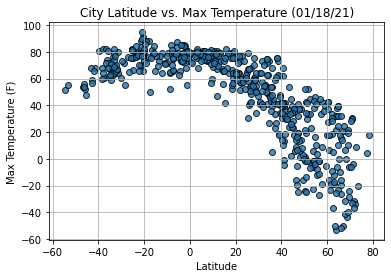

In [8]:
plt.scatter(city_data.lat, city_data.temp, edgecolors='black',alpha=.8)
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

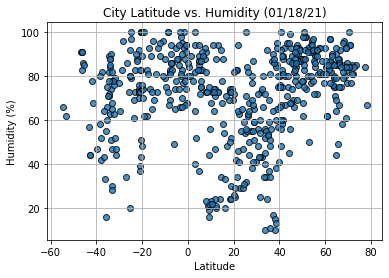

In [9]:
# Build the scatter plots for each city types
plt.scatter(city_data.lat, city_data.humidity, edgecolors='black',alpha=.8)
plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()

## Latitude vs. Cloudiness Plot

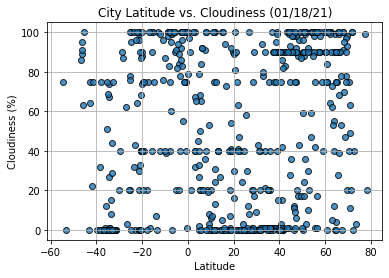

In [10]:
# Build the scatter plots for each city types
plt.scatter(city_data.lat, city_data.cloud, edgecolors='black',alpha=.8)
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.grid(True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show()

## Latitude vs. Wind Speed Plot

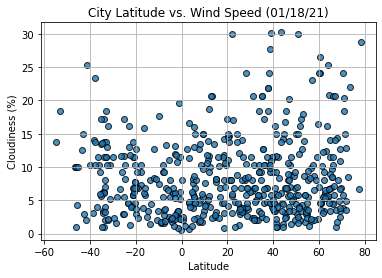

In [11]:
# Build the scatter plots for each city types
plt.scatter(city_data.lat, city_data.wind, edgecolors='black',alpha=.8)
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.grid(True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show()

## Linear Regression

In [13]:
# Create two new dataframes for northern and southern hemispheres

north_hemisphere = (city_data.loc[city_data.lat>0])
south_hemisphere = (city_data.loc[city_data.lat<0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.36x + 89.57
The R value (i.e. Coefficient of Correlation) is: -0.8261613261131918
The R squared value (i.e. Coefficient of Determination) is: 0.6825425367651077


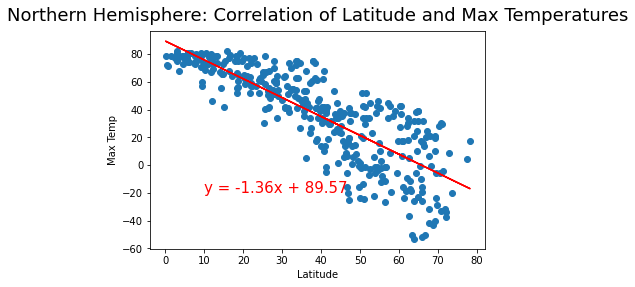

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere.lat ,north_hemisphere.temp)
regress_values = north_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere.lat,north_hemisphere.temp)
plt.plot(north_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Max Temperatures", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.31x + 79.69
The R value (i.e. Coefficient of Correlation) is: 0.4659836345304779
The R squared value (i.e. Coefficient of Determination) is: 0.217140747650234


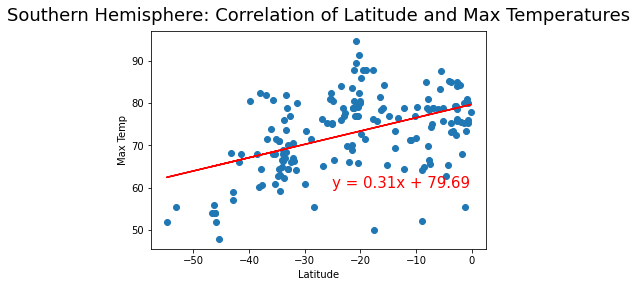

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere.lat ,south_hemisphere.temp)
regress_values = south_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere.lat,south_hemisphere.temp)
plt.plot(south_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Max Temperatures", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x + 56.03
The R value (i.e. Coefficient of Correlation) is: 0.3695287115858222
The R squared value (i.e. Coefficient of Determination) is: 0.13655146868627774


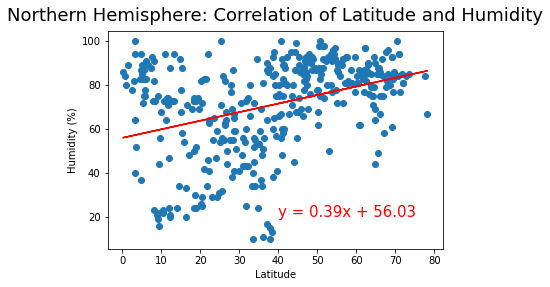

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere.lat ,north_hemisphere.humidity)
regress_values = north_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere.lat,north_hemisphere.humidity)
plt.plot(north_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Humidity", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.45x + 84.8
The R value (i.e. Coefficient of Correlation) is: 0.34979808290561226
The R squared value (i.e. Coefficient of Determination) is: 0.12235869880444158


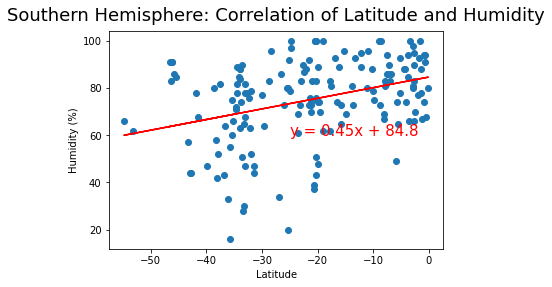

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere.lat ,south_hemisphere.humidity)
regress_values = south_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere.lat,south_hemisphere.humidity)
plt.plot(south_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Humidity", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.6x + 26.14
The R value (i.e. Coefficient of Correlation) is: 0.3018351924227061
The R squared value (i.e. Coefficient of Determination) is: 0.09110448338485203


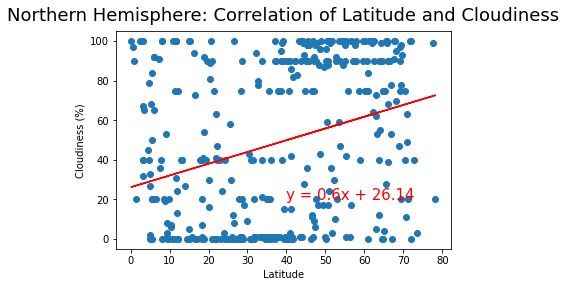

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere.lat ,north_hemisphere.cloud)
regress_values = north_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere.lat,north_hemisphere.cloud)
plt.plot(north_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Cloudiness", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.25x + 79.88
The R value (i.e. Coefficient of Correlation) is: 0.43031384778209075
The R squared value (i.e. Coefficient of Determination) is: 0.18517000759302837


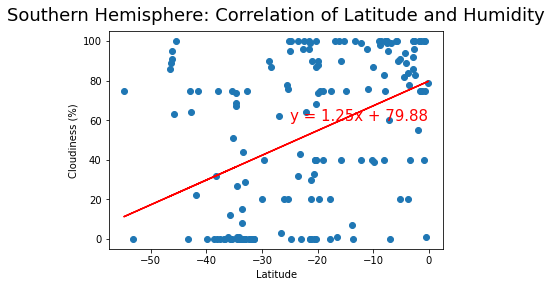

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere.lat ,south_hemisphere.cloud)
regress_values = south_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere.lat,south_hemisphere.cloud)
plt.plot(south_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Humidity", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x + 7.44
The R value (i.e. Coefficient of Correlation) is: 0.0925328869779347
The R squared value (i.e. Coefficient of Determination) is: 0.008562335172471238


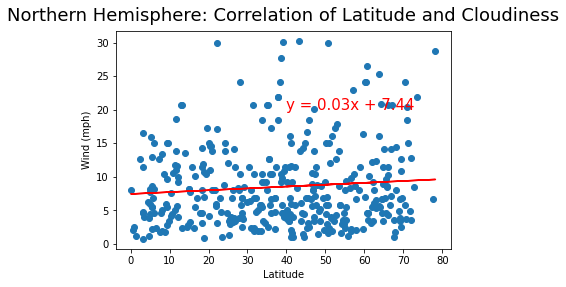

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere.lat ,north_hemisphere.wind)
regress_values = north_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere.lat,north_hemisphere.wind)
plt.plot(north_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Cloudiness", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Wind (mph)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.11x + 5.2
The R value (i.e. Coefficient of Correlation) is: -0.30422564891128784
The R squared value (i.e. Coefficient of Determination) is: 0.09255324545549418


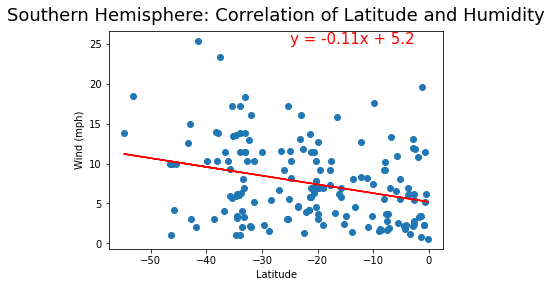

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere.lat ,south_hemisphere.wind)
regress_values = south_hemisphere.lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere.lat,south_hemisphere.wind)
plt.plot(south_hemisphere.lat,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Humidity", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Wind (mph)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()